## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

You can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
unzip bank+marketing.zip 
unzip bank.zip
```

We need `bank-full.csv`.

In this dataset the target variable is `y` variable - has the client subscribed a term deposit or not. 

### Dataset preparation

For the rest of the homework, you'll need to use only these columns:

* `'age'`,
* `'job'`,
* `'marital'`,
* `'education'`,
* `'balance'`,
* `'housing'`,
* `'contact'`,
* `'day'`,
* `'month'`,
* `'duration'`,
* `'campaign'`,
* `'pdays'`,
* `'previous'`,
* `'poutcome'`,
* `'y'`



Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mutual_info_score

In [2]:
df_full = pd.read_csv('../DATASETS/bank-full.csv', sep=";")
features = ["age", "job", "marital", "education", "balance", "housing", "contact", "day", "month", "duration", "campaign", "pdays", "previous", "poutcome", "y"]
df = df_full[features]

In [4]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [6]:
label = LabelEncoder()
df['y'] = label.fit_transform(df['y'])

C:\Users\kiramishima\AppData\Local\Temp\ipykernel_31948\2712820663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = label.fit_transform(df['y'])


In [8]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

In [13]:
numerical = [col for col in df_train.columns if df[col].dtype != 'object']
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [14]:

categorical = [col for col in df_train.columns if df[col].dtype == 'object']
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [9]:
dv = DictVectorizer(sparse=False)

In [10]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
X_train

array([[5.60e+01, 4.00e+01, 2.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [3.30e+01, 4.79e+03, 1.00e+00, ..., 0.00e+00, 0.00e+00, 2.00e+00],
       [3.20e+01, 3.92e+02, 2.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       ...,
       [5.20e+01, 2.89e+02, 1.30e+01, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [3.20e+01, 3.12e+02, 4.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [3.80e+01, 5.80e+02, 6.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00]])

In [11]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
X_val

array([[5.700e+01, 8.560e+02, 6.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.000e+01, 0.000e+00, 3.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+01, 5.956e+03, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [6.200e+01, 3.670e+02, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        5.000e+00],
       [4.400e+01, 1.432e+03, 9.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.500e+01, 2.220e+02, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        6.000e+00]])

In [12]:
print(len(df_train), len(df_val), len(df_test))

27126 9042 9043


### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- `duration` <- 
- `previous`

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from tqdm.notebook import tqdm

In [18]:
roc_auc_scores = []
for c in tqdm(numerical):
  score = roc_auc_score(y_train, df_train[c])
  if score < 0.5: #AUC can go below 0.5
    score = roc_auc_score(y_train, -df_train[c])
  roc_auc_scores.append(({'variable': c, 'score': score}))

df_scores = pd.DataFrame(roc_auc_scores)
df_scores.sort_values(by='score', ascending=False)


  0%|          | 0/7 [00:00<?, ?it/s]

,variable,score
3,duration,0.814700
6,previous,0.598565
5,pdays,0.590128
1,balance,0.588831
4,campaign,0.571454
2,day,0.525958
0,age,0.512186


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- 0.89 <-
- 0.99

In [19]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [20]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [21]:
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8986949789869498

In [24]:
round(roc_auc_score(y_val, y_pred), 3)

0.9

In [25]:
y_pred_bin = model.predict(X_val)
round(roc_auc_score(y_val, y_pred_bin), 3)

0.658

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265 <-
* 0.465
* 0.665
* 0.865

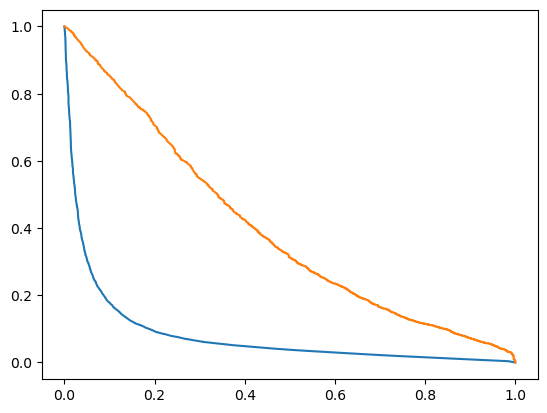

In [42]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.plot(fpr, thresholds)
plt.plot(tpr, thresholds)
plt.show()

C:\Users\kiramishima\AppData\Local\Temp\ipykernel_31948\1666051364.py:1: RuntimeWarning: invalid value encountered in divide
  precision = tpr / (tpr + fpr)


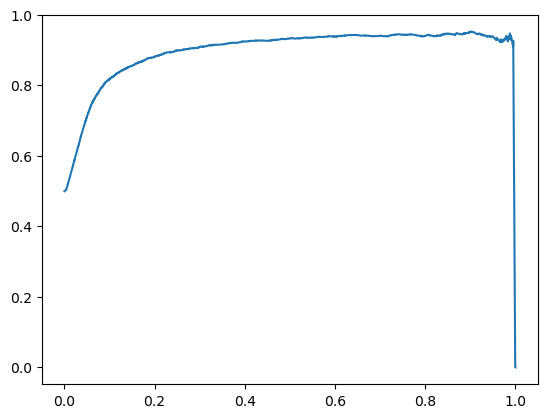

In [43]:
precision = tpr / (tpr + fpr)
plt.plot(thresholds, precision)
plt.show()    

In [44]:
start = 0
step = 0.01
stop = 1

thresholds = np.linspace(start, stop, int((stop - start) / step + 1))
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [45]:
scores = []
for t in tqdm(thresholds):
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

  0%|          | 0/101 [00:00<?, ?it/s]

In [46]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,1098,7944,0,0
1,0.01,1094,7004,4,940
2,0.02,1093,5789,5,2155
3,0.03,1087,4744,11,3200
4,0.04,1068,3800,30,4144
...,...,...,...,...,...
96,0.96,30,17,1068,7927
97,0.97,25,15,1073,7929
98,0.98,21,10,1077,7934
99,0.99,11,5,1087,7939


In [47]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

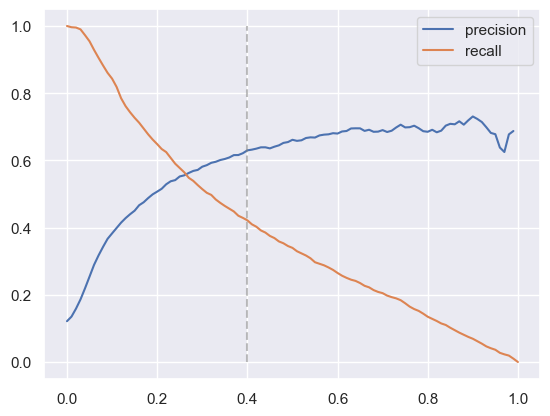

In [49]:
plt.plot(df_scores.threshold, df_scores.precision, label='precision')
plt.plot(df_scores.threshold, df_scores.recall, label='recall')

plt.vlines(0.4, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- 0.22 <-
- 0.42
- 0.62


In [56]:
idx = (2 * (df_scores.precision * df_scores.recall)/(df_scores.precision + df_scores.recall)).idxmax()

In [58]:
df_scores.iloc[idx]

threshold       0.220000
tp            686.000000
fp            611.000000
fn            412.000000
tn           7333.000000
precision       0.528913
recall          0.624772
Name: 22, dtype: float64

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006 <-
- 0.06
- 0.26

In [59]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [80]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [62]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [81]:
scores = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.y.values
    y_val = df_val.y.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('C=%s %.3f +- %.3f' % (1.0, np.mean(scores), np.std(scores)))

C=1.0 0.906 +- 0.005


### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1 <-

In [84]:
n_splits = 5
stds = []
for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = []
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    stds.append({'C':C, 'mean': np.mean(scores), 'std':  np.std(scores)})
    print('C=%s μ=%.3f σ=+- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 μ=0.701 σ= +- 0.009
C=0.001 μ=0.861 σ= +- 0.007
C=1 μ=0.906 σ= +- 0.005


In [85]:
pd.DataFrame(stds)

,C,mean,std
0,0.000001,0.701445,0.009444
1,0.001000,0.861033,0.006803
2,1.000000,0.905676,0.005322
